# This notebook is to perform PPV tradeoff analysis for all network components

In [1]:
import pandas as pd
# load joined network and goldstandard data
string_ppi = pd.read_csv('~/data0118/joined_smpl/string_GO_smpl_rm_plasmid')
refseq = pd.read_csv('~/data0118/joined_smpl/refseq_GO_smpl_rm_plasmid')
eskape = pd.read_csv('~/data0118/joined_smpl/eskape_GO_smpl_rm_plasmid')
domain = pd.read_csv('~/data0118/joined_smpl/domain_GO_smpl_rm_plasmid')

# combined net
pangenomenet = pd.read_csv('~/data0118/joined_smpl/pangenomeNet_GO_smpl_rm_plasmid')

# EcoliNet
ecolinet = pd.read_csv('~/data0118/joined_smpl/EcoliNet_GO_smpl_rm_plasmid')
                           
# Mentha
mentha = pd.read_csv('~/data0118/joined_smpl/mentha_GO_smpl_rm_plasmid')

In [2]:
# make into pipeline
nets = [string_ppi, refseq, eskape, domain, pangenomenet, ecolinet, mentha]
netname = ['STRING', 'RefseqNet', 'EskapeNet', 'DomainNet', 'PangenomeNet', 'EcoliNet', 'Mentha']
scorecol = ['combined_score', 'nrm_mutual', 'mutual_info', 'weighted_mutual', 'combined_score', 'Score', 'Score']
gene_set = ['all', 'core', 'accessory']
color = ['tomato', 'gold', 'yellowgreen', 'seagreen', 'royalblue', 'grey', 'rosybrown']

In [16]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/tf_intersect_GO_rm_plasmidGO.smpl'
gold = read_gold(gd)

result_dict = {}

for n, name, s in zip(nets, netname, scorecol):
    result_dict[name] = {}
    for gset in gene_set:
        #tradeoff = try_diff_lls_thres(n, gold, score_colname = s, gene_set = gset)
        tradeoff = pd.read_csv('~/data0118/PPV_coverage/{}_rm_plasmid_{}'.format(name, gset))
        result_dict[name][gset] = tradeoff
        #tradeoff.to_csv('~/data0118/PPV_coverage/{}_rm_plasmid_{}'.format(name, gset))
        print(gset, name)

all STRING
core STRING
accessory STRING
all RefseqNet
core RefseqNet
accessory RefseqNet
all EskapeNet
core EskapeNet
accessory EskapeNet
all DomainNet
core DomainNet
accessory DomainNet
all PangenomeNet
core PangenomeNet
accessory PangenomeNet
all EcoliNet
core EcoliNet
accessory EcoliNet
all Mentha
core Mentha
accessory Mentha


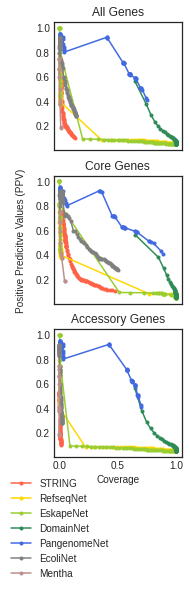

In [33]:
# plot together!!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.style.use('seaborn-white')

f, ax = plt.subplots(3,1, figsize = (2.3,8), sharex = True, sharey = True)

i = 0
for gset in gene_set:
    # import all PPV-coverage tradeoff
    for name, c in zip(netname, color):
        tradeoff = result_dict[name][gset]
        tradeoff = tradeoff.loc[(tradeoff['coverage']>0) & (tradeoff['PPV']>0)] # last bin has only 1 gene left
        ax[i].plot(tradeoff['coverage'], tradeoff['PPV'], '.-',  label = name, color = c)
        
    if i == 2:
        ax[i].set_xlabel('Coverage')
    #ax[i].set_ylabel('Positive Predicitve Values (PPV)')
    ax[i].set_title('{} Genes'.format(gset.capitalize()))
    #ax[i].set_xscale('logit')
    i += 1
    
plt.legend(bbox_to_anchor = (0.5,-0.1))
f.text(-0.1, 0.5, 'Positive Predicitve Values (PPV)', va='center', rotation='vertical')
#plt.suptitle('Network Performance on Different Sets of Genes')




#plt.tight_layout()
plt.savefig('/home/hermuba/data0118/fig/fig_4_PPV_coverage.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')

In [24]:
gold_anno.loc[gold_anno['core'], 'GO'].count()/gold_anno.loc[gold_anno['core'], 'GO'].shape[0]

0.761132409318785

In [25]:
gold_anno.loc[~gold_anno['core'], 'GO'].count()/gold_anno.loc[~gold_anno['core'], 'GO'].shape[0]

0.2643641516117605